<a href="https://colab.research.google.com/github/kl9u5/diveintopython/blob/master/lab04_solved_ipynb_m%C3%A1solata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import solve_ivp
import sympy # this one is new here!

# 1.Lotka-Volterra
This is a simple predator-prey population model from the early 20th century. And also nonlinear.

The equations:

$\frac{dx}{dt} =  x (B_x - D_x x + E_{yx} y) $

$ \frac{dy}{dt} = y (B_y - D_y y + E_{xy} x)$

Meanings of the parameters: 
$B_x$: birthrate of species X, $B_y$: birthrate of species Y

$D_x$: natural deathrate of species X, $D_y$: natural deathrate of species Y

$E_{xy}$: effect of species X on species Y, $E_{yx}$: effect of species Y on species X
(if one species is the predator, other the prey, then one of hese is negative)

## Define the differential equation as a callable function

In [ ]:
def y_prime_lotka_volterra(t, y, Bx, By, Dx, Dy, Exy, Eyx):
    return y[0] * (Bx - Dx * y[0] + Eyx * y[1]), y[1] * (By - Dy * y[1] + Exy * y[0])

# Integration timespan, parameters
Other interesting parameter sets are:

$B_x=5.0, B_y=5.0, D_x=1.0, D_y=1.0, E_{xy}=1.0, E_{yx}=-2.0$

$B_x=1.0, B_y=0.5, D_x=0.5, D_y=1.0, E_{xy}=-1.0, E_{yx}=1.0$

$B_x=1.0, B_y=-1.0, D_x=0.5, D_y=1.0, E_{xy}=1.0, E_{yx}=-1.0$

In [ ]:
t_span = (0, 20) # integration timespan
t_eval = np.linspace(*t_span, num=300) # time instances to evaluate the solution in
Bx =  4.0
By =  6.0 
Dx =  1.0
Dy =  1.0 
Exy = -2.0
Eyx = -2.0   

## Direction field

In [ ]:
X, Y = np.meshgrid(
   np.linspace(0, 7, num=48),
   np.linspace(0, 7, num=48)
) # points of the plane
U, V = X * (Bx - Dy * X + Eyx * Y), Y * (By - Dy * Y + Exy * X)  # values of the direction vectors in each of these points
magn = np.linalg.norm([U, V], axis=0) # magnitude (hint: numpy has built-in norms) - you have to specify an axis to compute along
U, V = U / magn, V / magn # normalisation

C:\Users\aronw\AppData\Local\Temp\ipykernel_23064\1349075648.py:7: RuntimeWarning: invalid value encountered in true_divide
  U, V = U / magn, V / magn # normalisation


## Plotting

### Phase portrait + direction field

In [ ]:
# Interesting points to launch trajectories from:
XY0 = [
    (1, 1),
    (7, 7),
    (3, 7),
    (7, 4),
    (7, 2),
    (1, 0.1),
]
x_range = np.linspace(0.1, 7, 10)
y_range = np.linspace(0.1, 7, 10)

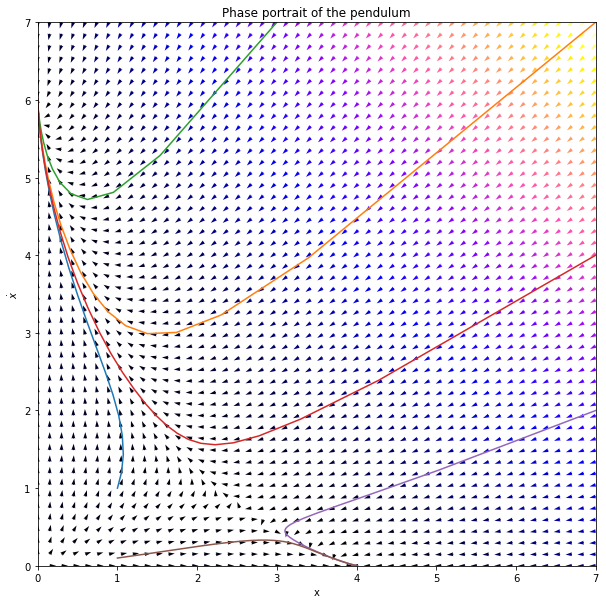

In [ ]:
plt.figure(figsize=(10, 10)) # create a figure object (no subplots needed)
for y0 in XY0:
    solution = solve_ivp(y_prime_lotka_volterra, t_span, y0, t_eval=t_eval, args=(Bx, By, Dx, Dy, Exy, Eyx, ))
    y_lotka_volterra = solution.y
    sns.lineplot(x=y_lotka_volterra[0], y=y_lotka_volterra[1], sort=False) # plot with seaborn
plt.quiver(X, Y, U, V, magn, cmap="gnuplot2")
plt.title("Phase portrait of the pendulum")
plt.xlabel("x")
plt.ylabel(r"$\dot{x}$")
plt.xlim([0, 7])
plt.ylim([0, 7])
plt.show()

Let's see the time evolution for these

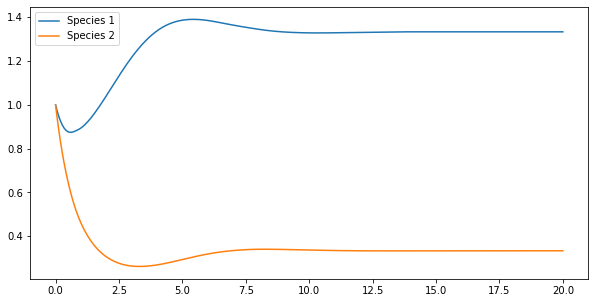

In [ ]:
y0 = XY0[0]
plt.figure(figsize=(10, 5))
solution = solve_ivp(y_prime_lotka_volterra, t_span, y0, t_eval=t_eval, args=(Bx, By, Dx, Dy, Exy, Eyx, ))
t_lotka_volterra, y_lotka_volterra = solution.t, solution.y
sns.lineplot(x=t_lotka_volterra, y=y_lotka_volterra[0], label="Species 1")
sns.lineplot(x=t_lotka_volterra, y=y_lotka_volterra[1], label="Species 2") 
plt.show()

# "Energy" surface

### Energy calculations
This time we can't really use anything like energy - this isn't really a physical system. So let's use a Lyapunov function instead (this kind of a metric of evolutionary fitness)!

$V(x,y) = x - \frac{4}{3} ln(x) + y - \frac{1}{3} ln(y)  $

In [ ]:
V = X - 4/3 * np.log(X) + Y - 1/3 * np.log(Y)

C:\Users\aronw\AppData\Local\Temp\ipykernel_23064\3491784283.py:1: RuntimeWarning: divide by zero encountered in log
  V = X - 4/3 * np.log(X) + Y - 1/3 * np.log(Y)


c:\Users\aronw\AppData\Local\Programs\Python\Python39\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:109: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


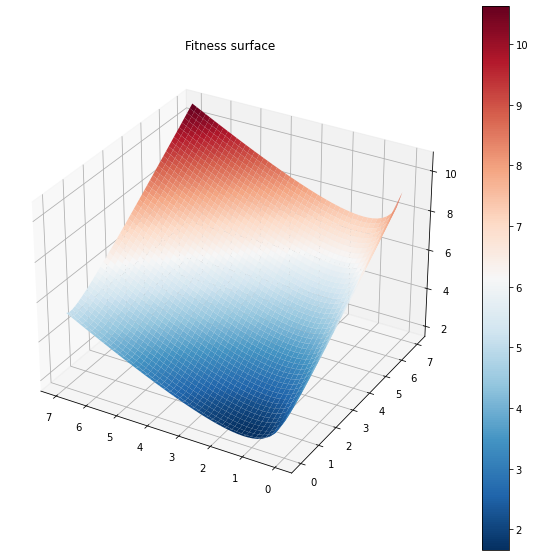

In [ ]:
fig, ax = plt.subplots(subplot_kw = {"projection" : "3d"})
fig.set_figheight(10)
fig.set_figwidth(10)
surf = ax.plot_surface(X, Y, V, cmap="RdBu_r")
ax.invert_yaxis()
plt.colorbar(surf)
plt.title("Fitness surface")
plt.show()

# 2. A biological example - a toggle switch
Toggle switches are biological networks where we can see a 'switching' in the system (between two stable states), depending on the concentration of one of its reactants. This behaviour most easily arises from mutually inhibitory networks (see figure below). Of course, the exact chemical behaviours (the mathematical model of the effects of one reactant on other) also influence how the system acts.

<img src="lac.png" />

An example can be described with the following ODE system:

$ \frac{dX}{dt} = \frac{\beta}{1 + Y^n} - \alpha X $

$ \frac{dY}{dt} = \frac{\beta}{1 + X^n} - \alpha Y $

## Define the differential equation as a callable function

In [ ]:
def y_prime_switch(t, y, alpha, beta, n):
    # Input: [y[0], y[1]] = [x, x']
    # Returns: [x', x''] = [beta / (1 + y^n) - alpha * x, beta / (1 + x^n) - alpha * y]
    return beta / (1 + y[1]**n) - alpha * y[0], beta / (1 + y[0]**n) - alpha * y[1]

## Integration time and initial values
Other parameter cases to try here are: $\frac{\alpha}{\beta} = 2, \frac{\alpha}{\beta}=1, n=2 $ (the latter for all three $\frac{\alpha}{\beta}$ configurations).

In [ ]:
t_span = (0, 10) # integration timespan
t_eval = np.linspace(*t_span, num=300) # evaluation points
y0 = [0.8, 1.4] # initial conditions
alpha = 1
beta = 2
n = 4

In [ ]:
solution_switch = solve_ivp(y_prime_switch, t_span, y0, t_eval=t_eval, args=(alpha, beta, n,))
t_switch, y_switch = solution_switch.t, solution_switch.y

## Plotting
Let's plot both the values of $x$ and $\dot{x}$ over time, and the phase portrait.

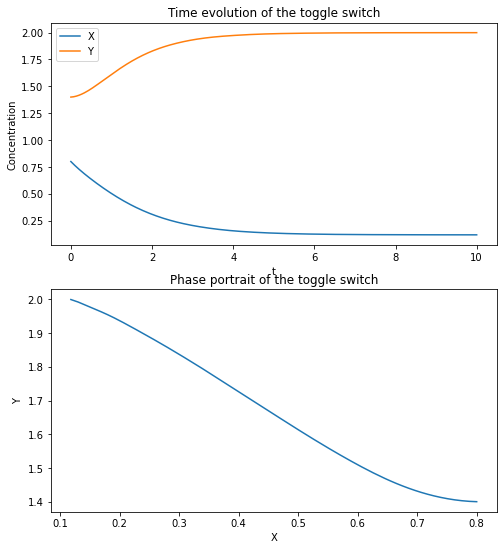

In [ ]:
fig = plt.figure(figsize=(8, 9))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
sns.lineplot(x=t_switch, y=y_switch[0], label="X", ax=ax1)
sns.lineplot(x=t_switch, y=y_switch[1], label="Y", ax=ax1)
ax1.set_title("Time evolution of the toggle switch")
ax1.set_xlabel("t")
ax1.set_ylabel("Concentration")
sns.lineplot(x=y_switch[0], y=y_switch[1], sort=False, ax=ax2)
ax2.set_title("Phase portrait of the toggle switch")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
plt.show()

Something funkier - a 3D plot showing both variables change with time

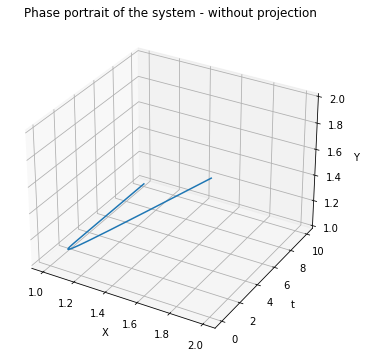

In [ ]:
fig, ax = plt.subplots(subplot_kw = {"projection" : "3d"})
fig.set_figheight(6)
fig.set_figwidth(6)
ax.plot3D(y_switch[0], t_switch, y_switch[1])
plt.title("Phase portrait of the system - without projection")
ax.set_xlabel("X")
ax.set_ylabel("t")
ax.set_zlabel("Y")
plt.show()

In [ ]:
X, Y = np.meshgrid(
    np.linspace(1e-4, beta/alpha, 15),
    np.linspace(1e-4, beta/alpha, 15)
)
U, V = beta / (1 + Y**n) - alpha * X, beta / (1 + X**n) - alpha * Y
magn = np.linalg.norm([U, V], axis=0)
U, V = U, V / magn

In [ ]:
x_range = np.linspace(1e-4, 2, 10)
y_range = np.linspace(1e-4, 2, 10)

In [ ]:
t_span = (0, 10) # integration timespan
t_eval = np.linspace(*t_span, num=300) # evaluation points

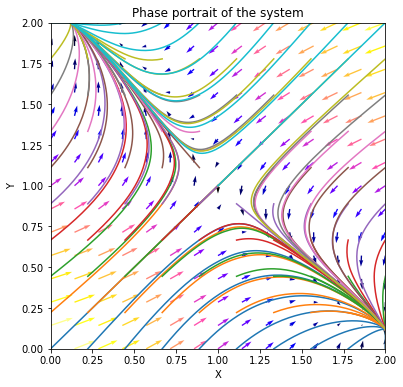

In [ ]:
fig = plt.figure(figsize=(6, 6))
for x in x_range:
    for y in y_range:
        y0 = [x, y]
        solution_switch = solve_ivp(y_prime_switch, t_span, y0, t_eval=t_eval, args=(alpha, beta, n, ))
        y_switch = solution_switch.y
        sns.lineplot(x=y_switch[0], y=y_switch[1], sort=False)
plt.quiver(X, Y, U, V, magn, cmap="gnuplot2")
plt.title("Phase portrait of the system")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim([0, 2])
plt.ylim([0, 2])
plt.show()

## Some "sugar": nullclines
These are parts of the plane where the value of one of the derivatives is 0.

They have the following forms:

$ X = \frac{\beta}{\alpha(1 + Y^n)} $ - nullcline of $X$
 
$ Y = \frac{\beta}{\alpha(1 + X^n)} $ - nullcline of $Y$

In [ ]:
nullcl_X = beta / (alpha * (1 + Y[:, 0]**4))
nullcl_Y = beta / (alpha * (1 + X[0, :]**4))

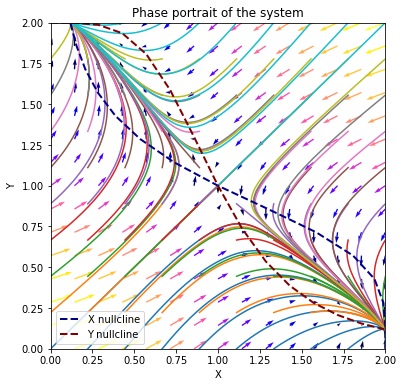

In [ ]:
fig = plt.figure(figsize=(6, 6))
for x in x_range:
    for y in y_range:
        y0 = [x, y]
        solution_switch = solve_ivp(y_prime_switch, t_span, y0, t_eval=t_eval, args=(alpha, beta, n, ))
        y_switch = solution_switch.y
        sns.lineplot(x=y_switch[0], y=y_switch[1], sort=False)
plt.quiver(X, Y, U, V, magn, cmap="gnuplot2")
sns.lineplot(x=nullcl_X, y=Y[:, 0], label="X nullcline", sort=False, lw=2, color="darkblue", linestyle="dashed")
sns.lineplot(x=X[0, :], y=nullcl_Y, label="Y nullcline", sort=False, lw=2, color="maroon", linestyle="dashed")
plt.title("Phase portrait of the system")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim([0, 2])
plt.ylim([0, 2])
plt.show()

# 3. Another biological example: red vs grey squirrels - a deathmatch
Grey squirrels: x_3, red squirrels: x_1, some other (not specified) creature: x_2

$\frac{dx_1}{dt} = x_1 (-4 - 3 x_1 + 7 x_2 - 4 x_3)$

$\frac{dx_2}{dt} = x_2 (-1 - x_1 + 2 x_2 -  x_3)$

$\frac{dx_3}{dt} = x_3 (-4 + 7 x_2 - 3 x_3)$

In [ ]:
def y_prime_squirrels(t, y):
    return y[0] * (-4 - 3*y[0] + 7 * y[1] - 4*y[2]), y[1] * (-1 - y[0] + 2 * y[1] - y[2]), y[2] * (-4 + 7 * y[1] - 3 * y[2])

In [ ]:
t_span = (0, 10) # integration timespan
t_eval = np.linspace(*t_span, num=300) # evaluation points
y0 = [0.8, 1.4, 2.3] # initial conditions

In [ ]:
solution_squirrels = solve_ivp(y_prime_squirrels, t_span, y0, t_eval=t_eval)
y_squirrels = solution_squirrels.y

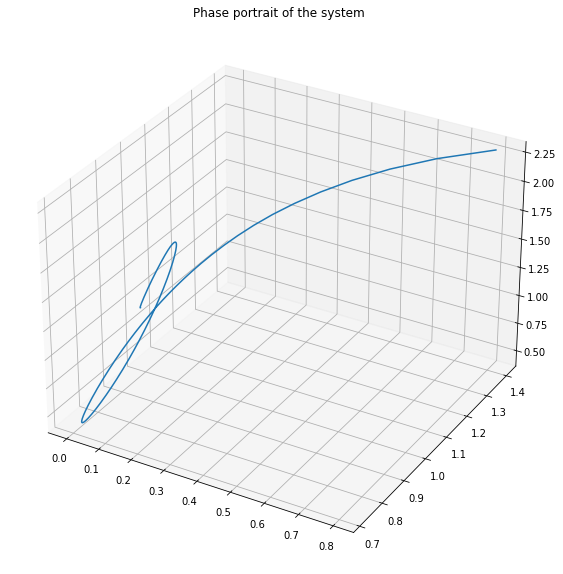

In [ ]:
fig, ax = plt.subplots(subplot_kw = {"projection" : "3d"})
fig.set_figheight(10)
fig.set_figwidth(10)
ax.plot3D(y_squirrels[0], y_squirrels[1], y_squirrels[2])
plt.title("Phase portrait of the system")
plt.show()